# Environment Setup

## Import Libraries

In [2]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# Import Data

In [3]:
# Importing datasets

user_interaction_df = pd.read_parquet('../../data/generated/hello-fresh/user_interaction_data.parquet')
delivery_preferences_df = pd.read_parquet('../../data/generated/hello-fresh/delivery_preferences.parquet')
recipe_preferences_df = pd.read_parquet('../../data/generated/hello-fresh/recipe_preferences.parquet')

In [4]:
# Set Report File Path

report_file_path = '../../reports/hello-fresh/'

# Exploratory Data Analysis

# Describe User Interaction Dataset

user_interaction_df.describe()

In [5]:
# Describe Delivery Preferences Dataset

delivery_preferences_df.describe()

,User ID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [6]:
# Describe Recipe Preferences Dataset

recipe_preferences_df.describe()

,User ID
count,5.000000
mean,3.000000
std,1.581139
min,1.000000
25%,2.000000
50%,3.000000
75%,4.000000
max,5.000000


In [7]:
# Get User Interaction Dataset Info

user_interaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   User ID                         5 non-null      int64  
 1   Sessions                        5 non-null      int64  
 2   Average Time per Session (min)  5 non-null      float64
 3   Favorite Recipes                5 non-null      object 
 4   Last Purchase                   5 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 332.0+ bytes


In [8]:
# Get Delivery Preferences Dataset Info

delivery_preferences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User ID                 5 non-null      int64 
 1   Delivery Address        5 non-null      object
 2   Delivery Frequency      5 non-null      object
 3   Preferred Delivery Day  5 non-null      object
dtypes: int64(1), object(3)
memory usage: 292.0+ bytes


In [9]:
# Get Recipe Preferences Dataset Info

recipe_preferences_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   User ID                 5 non-null      int64 
 1   Preferred Category      5 non-null      object
 2   Most Requested Recipes  5 non-null      object
dtypes: int64(1), object(2)
memory usage: 252.0+ bytes


# Data Visualization

## User Interaction Data Analysis

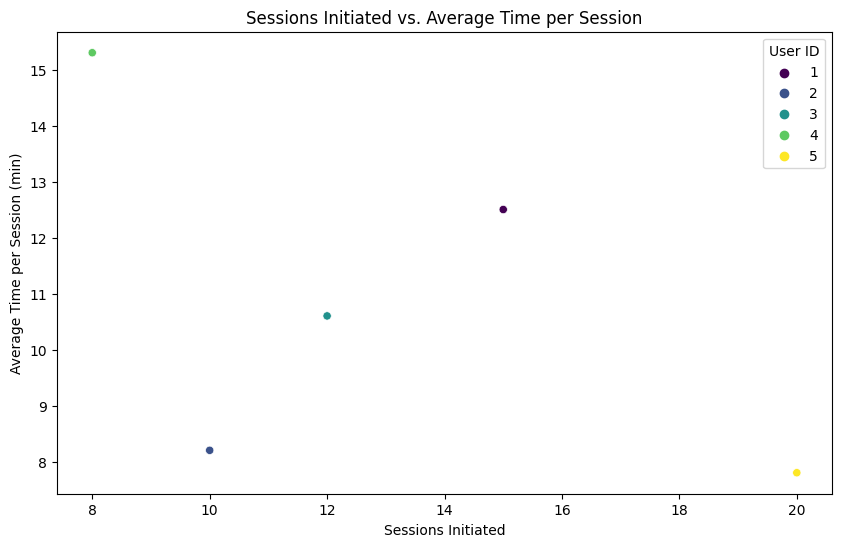

In [10]:
# Sessions Initiated vs. Average Time per Session

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sessions', y='Average Time per Session (min)', data=user_interaction_df, hue='User ID', palette='viridis')
plt.title('Sessions Initiated vs. Average Time per Session')
plt.xlabel('Sessions Initiated')
plt.ylabel('Average Time per Session (min)')
plt.savefig(f'{report_file_path}sessions_vs_time.png')
plt.show()


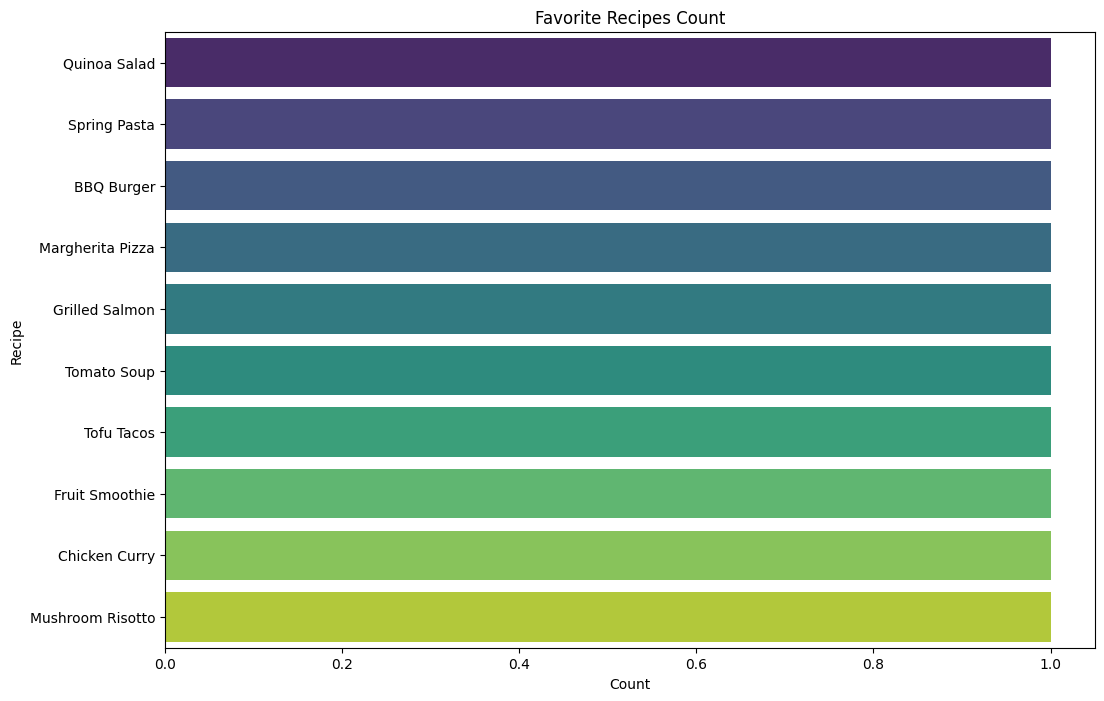

In [11]:

# Favorite Recipes Count
favorite_recipes = user_interaction_df['Favorite Recipes'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('Recipe')
plt.figure(figsize=(12, 8))
sns.countplot(y='Recipe', data=favorite_recipes, order=favorite_recipes['Recipe'].value_counts().index, palette='viridis')
plt.title('Favorite Recipes Count')
plt.xlabel('Count')
plt.ylabel('Recipe')
plt.savefig(f'{report_file_path}favorite_recipes_count.png')
plt.show()

In [12]:
favorite_recipes.head()

,Recipe
0,Quinoa Salad
0,Spring Pasta
1,BBQ Burger
1,Margherita Pizza
2,Grilled Salmon


## Delivery Preferences Analysis

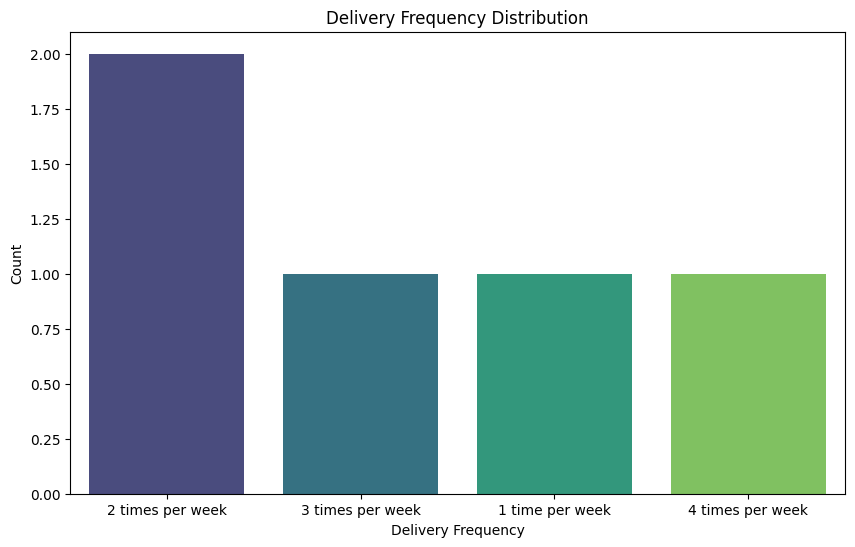

In [13]:
# Delivery Frequency Distribution

plt.figure(figsize=(10, 6))
sns.countplot(x='Delivery Frequency', data=delivery_preferences_df, palette='viridis')
plt.title('Delivery Frequency Distribution')
plt.xlabel('Delivery Frequency')
plt.ylabel('Count')
plt.savefig(f'{report_file_path}delivery_frequency_distribution.png')
plt.show()


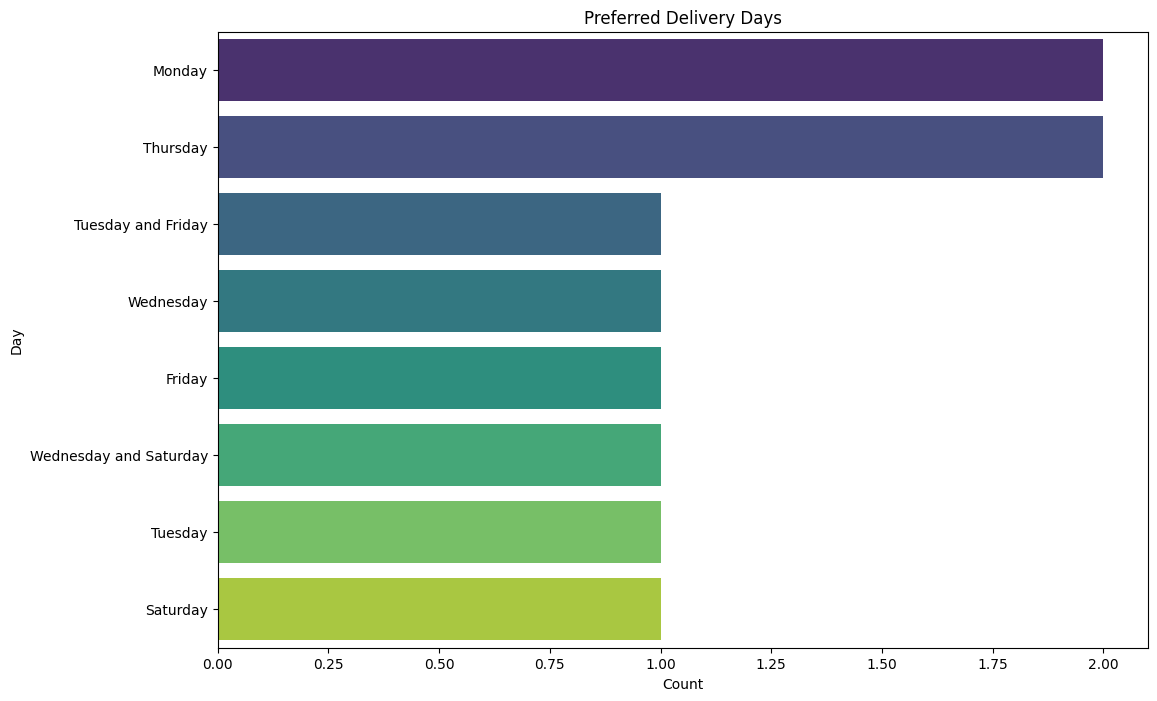

In [14]:

# Preferred Delivery Days

preferred_days = delivery_preferences_df['Preferred Delivery Day'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('Day')

plt.figure(figsize=(12, 8))
sns.countplot(y='Day', data=preferred_days, order=preferred_days['Day'].value_counts().index, palette='viridis')
plt.title('Preferred Delivery Days')
plt.xlabel('Count')
plt.ylabel('Day')
plt.savefig(f'{report_file_path}preferred_delivery_days.png')
plt.show()


## Recipe Preferences Analysis

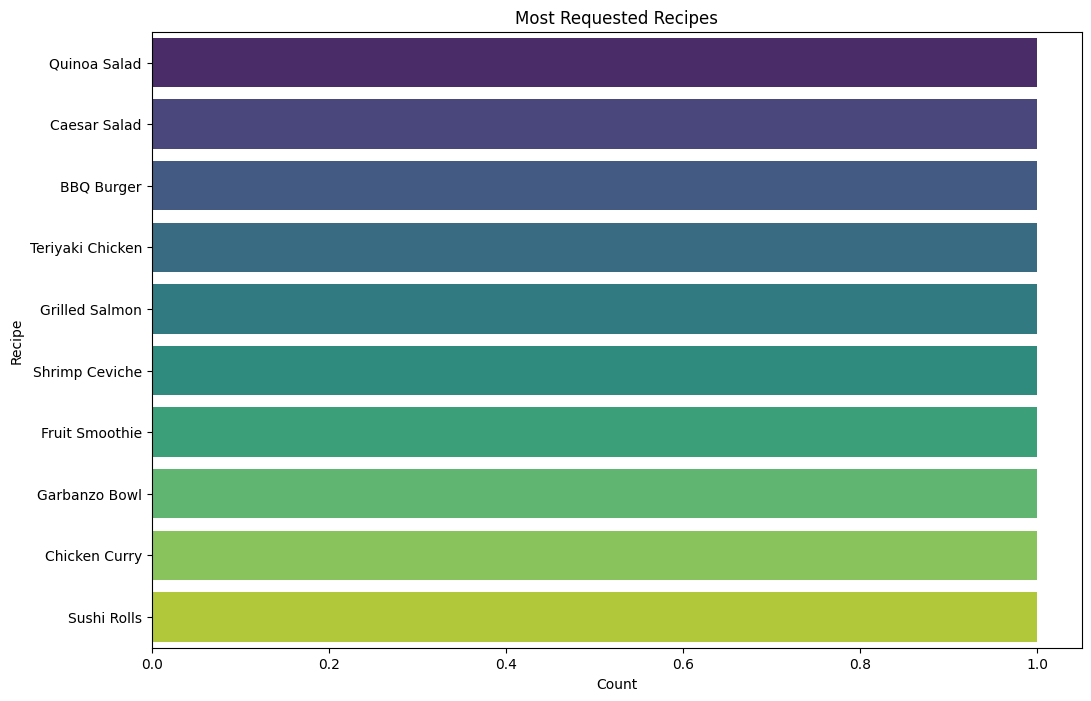

In [15]:
# Most Requested Recipes
most_requested_recipes = recipe_preferences_df['Most Requested Recipes'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True).to_frame('Recipe')

plt.figure(figsize=(12, 8))
sns.countplot(y='Recipe', data=most_requested_recipes, order=most_requested_recipes['Recipe'].value_counts().index, palette='viridis')
plt.title('Most Requested Recipes')
plt.xlabel('Count')
plt.ylabel('Recipe')
plt.savefig(f'{report_file_path}most_requested_recipes.png')
plt.show()


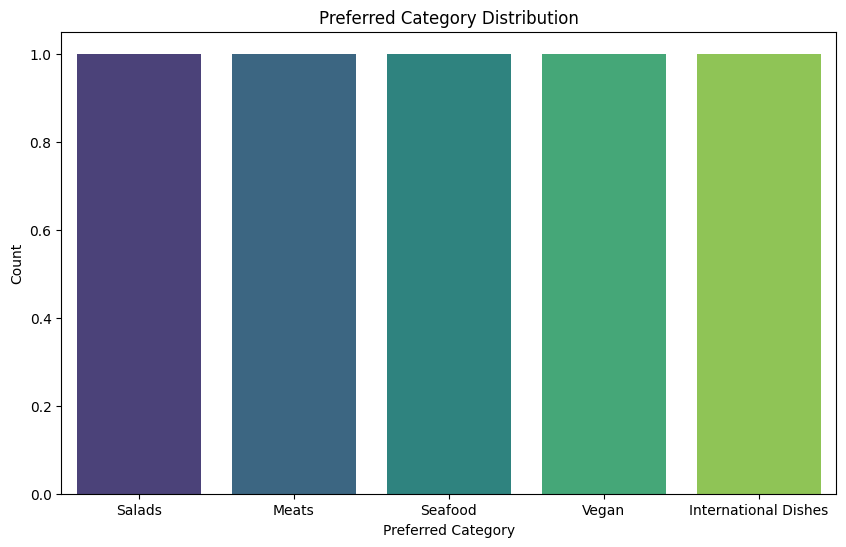

In [16]:

# Preferred Category Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Preferred Category', data=recipe_preferences_df, palette='viridis')
plt.title('Preferred Category Distribution')
plt.xlabel('Preferred Category')
plt.ylabel('Count')
plt.savefig(f'{report_file_path}preferred_category_distribution.png')
plt.show()

## Combined Data Visualizations

### Combine Datasets

In [17]:

# Create copies of the original dataframes for encoding
from sklearn.calibration import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder


encoded_user_interaction_data = user_interaction_df.copy()
encoded_delivery_preferences_data = delivery_preferences_df.copy()
encoded_recipe_preferences_data = recipe_preferences_df.copy()

In [18]:

# Initialize LabelEncoder and OrdinalEncoder
label_encoder = LabelEncoder()
ordinal_encoder = OrdinalEncoder()

In [19]:

# Encode non-ordinal categorical variables in user_interaction_data
encoded_user_interaction_data['Favorite Recipes'] = label_encoder.fit_transform(encoded_user_interaction_data['Favorite Recipes'])

In [20]:

# Encode non-ordinal categorical variables in recipe_preferences_data
encoded_recipe_preferences_data['Preferred Category'] = label_encoder.fit_transform(encoded_recipe_preferences_data['Preferred Category'])

In [21]:

# Encode ordinal categorical variables in delivery_preferences_data
encoded_delivery_preferences_data['Delivery Frequency'] = ordinal_encoder.fit_transform(encoded_delivery_preferences_data[['Delivery Frequency']])
encoded_delivery_preferences_data['Preferred Delivery Day'] = ordinal_encoder.fit_transform(encoded_delivery_preferences_data[['Preferred Delivery Day']])

In [22]:
# Merge encoded dataframes based on 'User ID'
merged_data = pd.merge(encoded_user_interaction_data, encoded_delivery_preferences_data, on='User ID')
merged_data = pd.merge(merged_data, encoded_recipe_preferences_data, on='User ID')

In [23]:
# Convert 'Last Purchase' to numeric (days since a reference date)
merged_data['Last Purchase'] = pd.to_datetime(merged_data['Last Purchase'])
merged_data['Last Purchase'] = (merged_data['Last Purchase'] - merged_data['Last Purchase'].min()).dt.days

In [24]:
# Drop columns 'Most Requested Recipes' and 'Delivery Address'
columns_to_drop = ['Most Requested Recipes', 'Delivery Address']
merged_data = merged_data.drop(columns=columns_to_drop, errors='ignore')

In [25]:
merged_data.to_parquet('../../data/generated/hello-fresh/merged_data.parquet')

### Visualizations

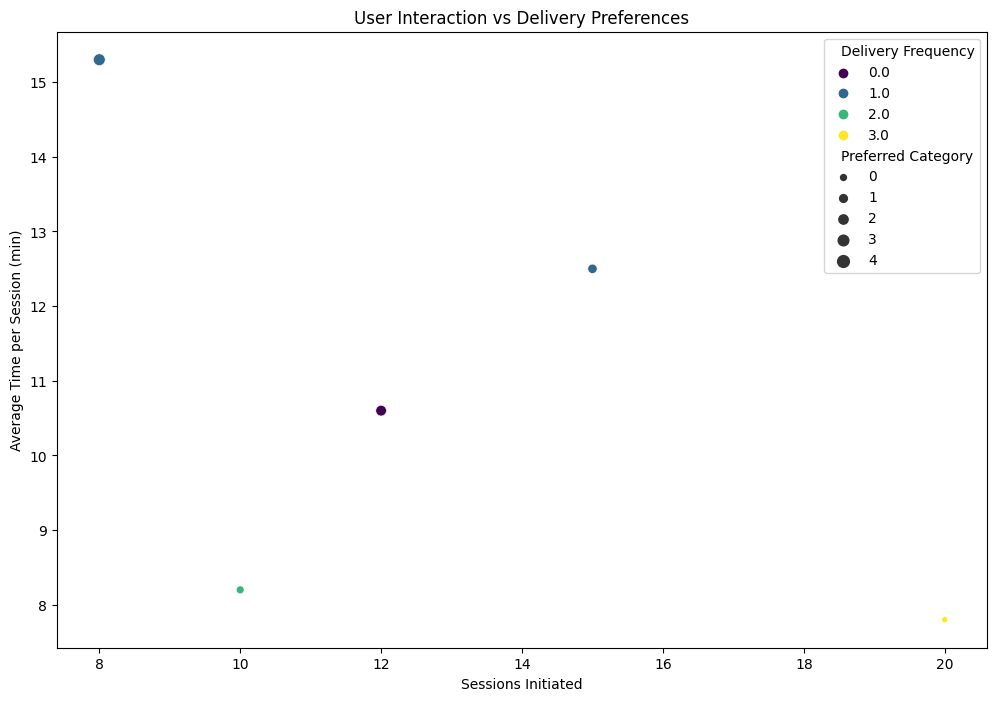

In [26]:
# User Interaction Data combined with Delivery Preferences
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(x='Sessions', y='Average Time per Session (min)', hue='Delivery Frequency', size='Preferred Category', data=merged_data, palette='viridis', ax=ax)
plt.title('User Interaction vs Delivery Preferences')
plt.xlabel('Sessions Initiated')
plt.ylabel('Average Time per Session (min)')
plt.savefig(f'{report_file_path}user_interaction_vs_delivery.png')
plt.show()


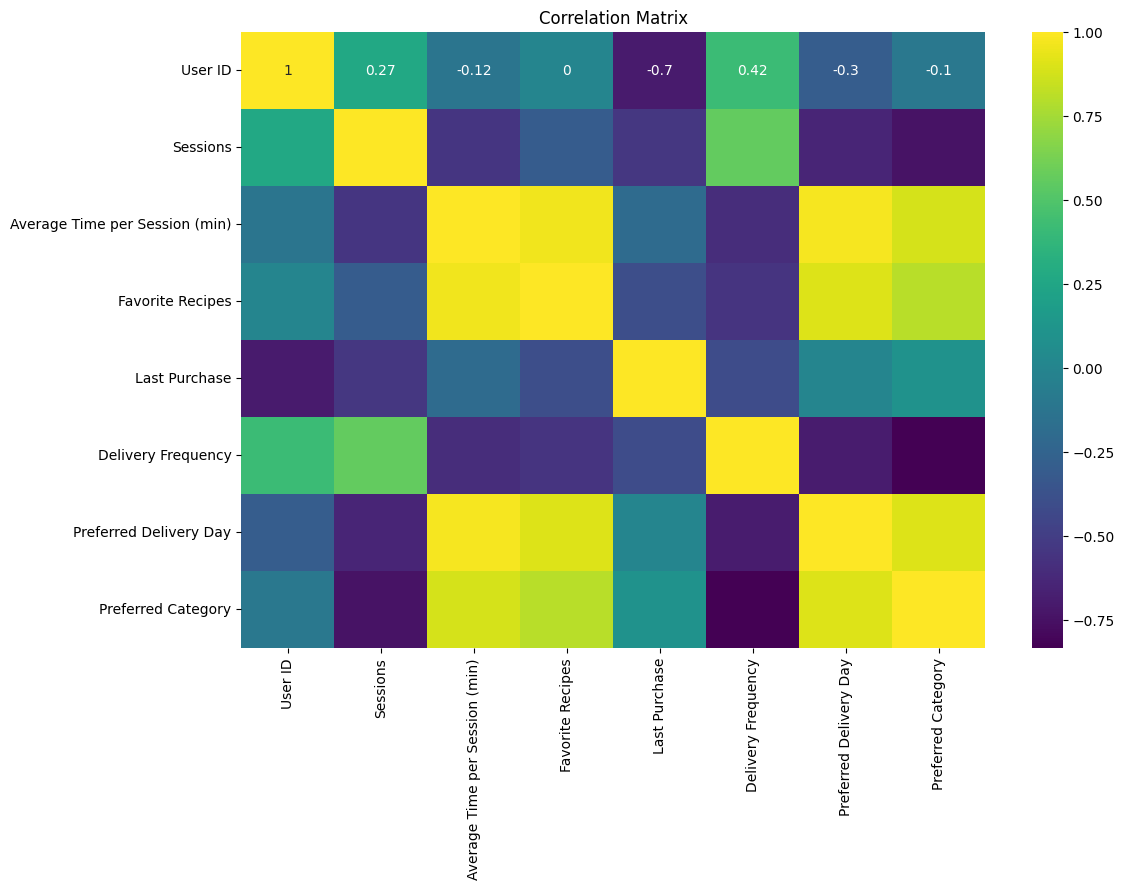

In [27]:

# Insights and possible correlations
corr = merged_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.savefig(f'{report_file_path}correlation_matrix.png')
plt.show()
